In [2]:
%run synthesis

In [3]:
'''
The width 'a' was measured with calipers to be about 22.29 mm +- .01 mm

max of open?: "3.98 mV" but this should be a square unit
max of shorted?: "1.42 mv" agan, should be square
'''
# All numbers are given in GHz
nulls = {}
nulls['open3'] = np.array([4.45, 9.55, 14.50, 19.40, 24.30, 29.35, 34.45, 39.55, 44.6, 49.5])
nulls['short3'] = np.array([5.45, 10.4, 15.35, 20.5, 25.6, 30.35, 35.6, 40.25, 45.5])

nulls['7'] = np.array([8.8, 15.15])
nulls['7.1'] = np.array([10.5, 16.35])
nulls['7.2'] = np.array([11.95, 17.15])
nulls['7.3'] = np.array([12.65, 17.4])

nulls['open7.5'] = np.array([10.05, 14.4])
nulls['short7.5'] = np.array([11.15, 15.35])

nulls['7.6'] = np.array([10.85, 14.75])
nulls['7.7'] = np.array([11.65, 15.45])
nulls['7.8'] = np.array([8.7, 12.25, 15.85])
nulls['7.9'] = np.array([9.5, 13.35, 16.3])

nulls['8'] = np.array([10.15, 13.35, 16.7])
nulls['8.5'] = np.array([9.85, 12.7, 15.25])
nulls['9'] = np.array([9.3, 12.3, 14.25, 16.7])
nulls['9.25'] = np.array([10.15, 12.45, 14.85, 17.2])
nulls['9.5'] = np.array([8.9, 11.15, 13.35, 15.45, 17.7])
nulls['9.75'] = np.array([9.75, 11.8, 14.25, 16.05])
nulls['10'] = np.array([8.45, 10.45, 12.3, 14.35, 16.5])
nulls['10.5'] = np.array([9.95, 11.75, 13.5, 15.45, 17.3])
nulls['11'] = np.array([9.35, 11.4, 12.65, 14.45, 16.2, 17.85])
nulls['11.5'] = np.array([8.95, 10.45, 12, 13.8, 15.15, 16.8])
nulls['12'] = np.array([8.4, 9.85, 11.35, 12.85, 14.4, 15.9, 17.45])

In [4]:
# Do we start numbering the nulls at one or zero??
# Degree one: we demand a straight line
open3fit = np.polyfit(null_range(len(nulls['open3'])), nulls['open3'], 1)
v_open3 = open3fit[0] * 3e9
v_open3 / 3e10

0.5007575757575756

In [5]:
xband_y = fs(np.array([7, 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 7.8, 7.9, 8, 8.5, 9, 9.25, 9.5, 9.75, 10, 10.5, 11, 11.5, 12]))
xband_x = []

frqs = [7., 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 7.8, 7.9, 8., 8.5, 9, 9.25, 9.5,
           9.75, 10, 10.5, 11, 11.5, 12]

xband_x.append(length(nulls['7'], 7))
xband_x.append(length(nulls['7.1'], 7.1))
xband_x.append(length(nulls['7.2'], 7.2))
xband_x.append(length(nulls['7.2'], 7.3))

xband_x.append(length(nulls['open7.5'], 7.5))

xband_x.append(length(nulls['7.6'], 7.6))
xband_x.append(length(nulls['7.7'], 7.7))
xband_x.append(length(nulls['7.8'], 7.8))
xband_x.append(length(nulls['7.9'], 7.9))

xband_x.append(length(nulls['8'], 8))
xband_x.append(length(nulls['8.5'], 8.5))
xband_x.append(length(nulls['9'], 9))
xband_x.append(length(nulls['9.25'], 9.25))
xband_x.append(length(nulls['9.5'], 9.5))
xband_x.append(length(nulls['9.75'], 9.75))
xband_x.append(length(nulls['10'], 10))
xband_x.append(length(nulls['10.5'], 10.5))
xband_x.append(length(nulls['11'], 11))
xband_x.append(length(nulls['11.5'], 11.5))
xband_x.append(length(nulls['12'], 12))
xband_x

[44449999999.99999,
 41535000000.00001,
 37440000000.0,
 37959999999.99999,
 32625000000.000008,
 29639999999.999992,
 29259999999.99999,
 27884999999.99998,
 26859999999.99998,
 26199999999.99998,
 22950000000.0,
 21735000000.000004,
 21783749999.999992,
 20804999999.999992,
 20816250000.000008,
 19999999999.999996,
 19320000000.0,
 18448571428.57141,
 18120714285.714287,
 18128571428.571426]

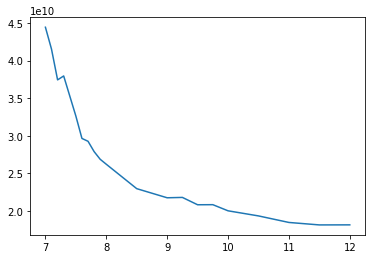

In [8]:
plt.plot(frqs, xband_x)
plt.show()

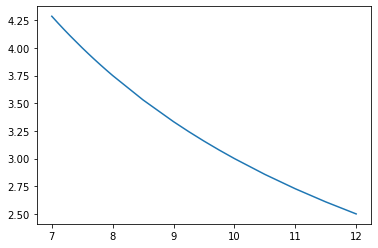

In [9]:
plt.plot(frqs, xband_y)
plt.show()

Tutorials:
https://github.com/AaronParsons/ugradio/blob/master/jupyter_tutorials/lab2/Central%20Limit%20Theorem%20and%20Averaging.ipynb

https://github.com/AaronParsons/ugradio/blob/master/jupyter_tutorials/lab2/chisq_intro.ipynb

In [75]:
def a_tester(a):
    return xband_y / np.sqrt(1 - (xband_y / 2 / a) ** 2) / xband_x

In [76]:
def chisq_noerr(a):
    return np.sum(np.abs(1 - a_tester(a))**2)

In [77]:
import scipy.optimize
minzd = scipy.optimize.fmin(chisq_noerr, 5)
print('a =', np.around(minzd, 5))

Optimization terminated successfully.
         Current function value: 20.000000
         Iterations: 26
         Function evaluations: 52
a = [2.14294]


C:\Users\Lukas\Anaconda3\envs\ay160\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\Lukas\Anaconda3\envs\ay160\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
